In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import datetime
from statsmodels.formula.api import ols
import scipy.stats as stats

In [2]:
df_tel = pd.read_csv('Telemarketing Data_1.csv', encoding='cp949', parse_dates = ['연락일자'])

In [3]:
df_tel.head()

,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류,Age,통화시간대2,재연락
0,주부,결혼,중졸,없음,없음,없음,유선전화,1,안함,0,no,2018-01-03,87,50대,5분 미만,0
1,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,1,안함,0,no,2018-01-03,88,50대,5분 미만,0
2,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,1,안함,0,no,2018-01-03,89,30대,5분 미만,0
3,회사원,결혼,검정고시,없음,없음,없음,유선전화,1,안함,0,no,2018-01-03,90,30대,5분 미만,0
4,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,1,안함,0,no,2018-01-03,91,50대,10분 미만,0


In [4]:
df_tel['year'] = pd.DatetimeIndex(df_tel['연락일자']).year
df_tel['month'] = pd.DatetimeIndex(df_tel['연락일자']).month
df_tel['day'] = pd.DatetimeIndex(df_tel['연락일자']).day

연락일자를 요일에 따라 분류

In [5]:
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
tel_day = []
for i in range(len(df_tel)):
    tel_day.append(days[datetime.date(df_tel['year'][i],df_tel['month'][i],df_tel['day'][i]).weekday()])
    
df_tel['연락요일'] = tel_day

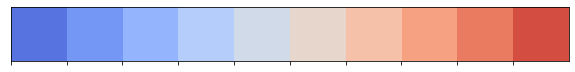

In [6]:
color = sns.color_palette('coolwarm', 10)
sns.palplot(color)

요일에 따른 연락시도횟수 피벗테이블, 시각화  
토요일, 금요일, 목요일 순으로 연락시도횟수가 가장 높음. 일요일에 가장 낮음

,연락요일,연락시도횟수
0,금요일,6531
1,목요일,5834
2,수요일,5826
3,월요일,5349
4,일요일,5101
5,토요일,7179
6,화요일,5368


<AxesSubplot:xlabel='연락요일', ylabel='연락시도횟수'>

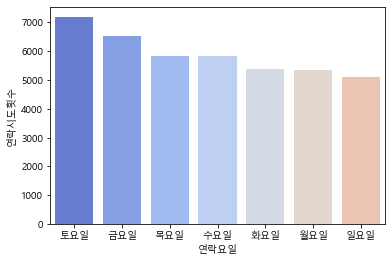

In [7]:
p_day = pd.pivot_table(data=df_tel, index=['연락요일'], values=['연락시도횟수'], aggfunc='count').reset_index()
# p_day = p_day.sort_values(by='연락시도횟수', ascending=False)['연락시도횟수']
order_list = p_day.sort_values(by='연락시도횟수', ascending=False)['연락요일'].to_list()
display(p_day)
sns.barplot(data=p_day, x='연락요일', y='연락시도횟수', order = order_list, palette = color)

요일별 계약여부 비율

In [8]:
p_day_2 = pd.pivot_table(data=df_tel, index=['연락요일', '계약여부'], values=['연락시도횟수'], aggfunc='count').reset_index()

p_day_2['%'] = p_day_2['연락시도횟수'].div(p_day_2.groupby('연락요일')['연락시도횟수'].transform('sum'))
p_day_2

,연락요일,계약여부,연락시도횟수,%
0,금요일,no,5793,0.887000
1,금요일,yes,738,0.113000
2,목요일,no,5185,0.888756
3,목요일,yes,649,0.111244
4,수요일,no,5144,0.882939
5,수요일,yes,682,0.117061
6,월요일,no,4684,0.875678
7,월요일,yes,665,0.124322
8,일요일,no,4646,0.910802
9,일요일,yes,455,0.089198


요일별 계약여부 누적막대그래프

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '토요일'),
  Text(1, 0, '금요일'),
  Text(2, 0, '목요일'),
  Text(3, 0, '수요일'),
  Text(4, 0, '화요일'),
  Text(5, 0, '월요일'),
  Text(6, 0, '일요일')])

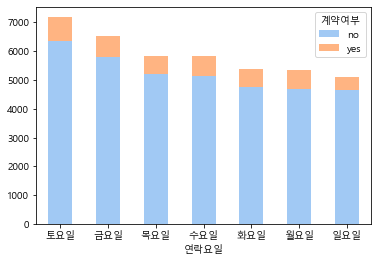

In [52]:
sns.set_palette('pastel')
tel_day_g = df_tel.groupby(['연락요일', '계약여부'])['계약여부'].count().unstack('계약여부').fillna(0)
tel_day_g = tel_day_g.sort_values(by='no', ascending=False)
tel_day_g.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)

In [54]:
tel_day_g['%'] = tel_day_g['yes'] /(tel_day_g['no'] + tel_day_g['yes'])
tel_day_g

계약여부,no,yes,%
연락요일,,,
토요일,6347,832,0.115894
금요일,5793,738,0.113000
목요일,5185,649,0.111244
수요일,5144,682,0.117061
화요일,4749,619,0.115313
월요일,4684,665,0.124322
일요일,4646,455,0.089198


카이제곱검정  
H0 : 연락한 요일에 따른 계약여부에 차이가 없다  
H1 : 연락한 요일에 따른 계약여부에 차이가 있다  
p-value < 0.05로 연락한 요일에 따른 계약여부에 차이가 있다

In [10]:
display(tel_day_g)
chi, pval, dof, expected = stats.chi2_contingency(observed = tel_day_g)
print('chi-square test')
print('chisq : {0:.3f}'.format(chi))
print('p : {0:3f}'.format(pval))
display(pd.DataFrame(expected.round(0)))

계약여부,no,yes
연락요일,,
토요일,6347,832
금요일,5793,738
목요일,5185,649
수요일,5144,682
화요일,4749,619
월요일,4684,665
일요일,4646,455


chi-square test
chisq : 37.749
p : 0.000001


,0,1
0,6370.0,809.0
1,5795.0,736.0
2,5177.0,657.0
3,5170.0,656.0
4,4763.0,605.0
5,4746.0,603.0
6,4526.0,575.0


In [11]:
def job_tel_day(df, val):
    df_job = df[df['직업군'] == val]
    p_day = pd.pivot_table(data=df_job, index=['연락요일'], values=['연락시도횟수'], aggfunc='count').reset_index()
    # p_day = p_day.sort_values(by='연락시도횟수', ascending=False)['연락시도횟수']
    order_list = p_day.sort_values(by='연락시도횟수', ascending=False)['연락요일'].to_list()
    sns.barplot(data=p_day, x='연락요일', y='연락시도횟수', order = order_list, palette = color)
    
    p_day_2 = pd.pivot_table(data=df_job, index=['연락요일', '계약여부'], values=['연락시도횟수'], aggfunc='count').reset_index()
    p_day_2['%'] = p_day_2['연락시도횟수'].div(p_day_2.groupby('연락요일')['연락시도횟수'].transform('sum'))
    p_day_2
    
    tel_day_g = df_job.groupby(['연락요일', '계약여부'])['계약여부'].count().unstack('계약여부').fillna(0)
    tel_day_g = tel_day_g.sort_values(by='no', ascending=False)
    tel_day_g.plot(kind='bar', stacked=True)
    plt.xticks(rotation=0)
    
    chi, pval, dof, expected = stats.chi2_contingency(observed = tel_day_g)
    print('{} chi-square test '.format(val))
    print('chisq : {0:.3f}'.format(chi))
    print('p : {0:3f}'.format(pval))
    display(tel_day_g)
    display(pd.DataFrame(expected.round(0)))

In [12]:
df_tel['직업군'].unique()

array(['주부', '서비스종사자', '회사원', '산업노동자', '기술자', '은퇴', '공무원', '미취업자', '자영업자',
       '미확인', '기업가', '학생'], dtype=object)

주부 chi-square test 
chisq : 11.469
p : 0.074925


계약여부,no,yes
연락요일,,
토요일,172,23
금요일,154,20
수요일,148,10
일요일,130,8
목요일,129,23
화요일,111,13
월요일,110,9


,0,1
0,176.0,20.0
1,157.0,17.0
2,142.0,16.0
3,124.0,14.0
4,137.0,15.0
5,112.0,12.0
6,107.0,12.0


서비스종사자 chi-square test 
chisq : 3.702
p : 0.716882


계약여부,no,yes
연락요일,,
토요일,619,51
금요일,592,49
목요일,523,55
수요일,518,42
일요일,506,46
화요일,461,36
월요일,427,44


,0,1
0,615.0,55.0
1,589.0,52.0
2,531.0,47.0
3,514.0,46.0
4,507.0,45.0
5,457.0,40.0
6,433.0,38.0


회사원 chi-square test 
chisq : 17.649
p : 0.007173


계약여부,no,yes
연락요일,,
토요일,1640,249
금요일,1424,212
수요일,1297,196
월요일,1247,195
목요일,1209,199
화요일,1155,188
일요일,1098,113


,0,1
0,1644.0,245.0
1,1424.0,212.0
2,1299.0,194.0
3,1255.0,187.0
4,1225.0,183.0
5,1169.0,174.0
6,1054.0,157.0


산업노동자 chi-square test 
chisq : 8.738
p : 0.188859


계약여부,no,yes
연락요일,,
토요일,1409,115
금요일,1348,89
목요일,1261,79
수요일,1212,104
일요일,1194,80
화요일,1109,79
월요일,1083,92


,0,1
0,1419.0,105.0
1,1338.0,99.0
2,1248.0,92.0
3,1225.0,91.0
4,1186.0,88.0
5,1106.0,82.0
6,1094.0,81.0


기술자 chi-square test 
chisq : 5.454
p : 0.487050


계약여부,no,yes
연락요일,,
토요일,1014,129
금요일,939,127
목요일,863,103
화요일,856,101
수요일,845,106
월요일,791,97
일요일,705,67


,0,1
0,1019.0,124.0
1,951.0,115.0
2,861.0,105.0
3,853.0,104.0
4,848.0,103.0
5,792.0,96.0
6,688.0,84.0


은퇴 chi-square test 
chisq : 8.425
p : 0.208571


계약여부,no,yes
연락요일,,
목요일,209,64
토요일,207,85
금요일,206,66
화요일,187,54
수요일,172,59
월요일,166,70
일요일,139,36


,0,1
0,204.0,69.0
1,218.0,74.0
2,203.0,69.0
3,180.0,61.0
4,173.0,58.0
5,176.0,60.0
6,131.0,44.0


공무원 chi-square test 
chisq : 13.054
p : 0.042187


계약여부,no,yes
연락요일,,
토요일,494,50
금요일,417,62
목요일,371,33
수요일,346,51
화요일,334,49
일요일,328,34
월요일,306,49


,0,1
0,483.0,61.0
1,425.0,54.0
2,359.0,45.0
3,352.0,45.0
4,340.0,43.0
5,321.0,41.0
6,315.0,40.0


미취업자 chi-square test 
chisq : 5.145
p : 0.525346


계약여부,no,yes
연락요일,,
토요일,165,25
목요일,140,18
금요일,132,22
수요일,131,22
화요일,105,20
일요일,99,13
월요일,98,24


,0,1
0,163.0,27.0
1,136.0,22.0
2,132.0,22.0
3,131.0,22.0
4,107.0,18.0
5,96.0,16.0
6,105.0,17.0


자영업자 chi-square test 
chisq : 2.558
p : 0.861952


계약여부,no,yes
연락요일,,
토요일,231,29
금요일,190,26
목요일,186,22
수요일,174,20
월요일,168,20
일요일,164,13
화요일,159,19


,0,1
0,233.0,27.0
1,193.0,23.0
2,186.0,22.0
3,174.0,20.0
4,168.0,20.0
5,158.0,19.0
6,159.0,19.0


미확인 chi-square test 
chisq : 3.187
p : 0.785029


계약여부,no,yes
연락요일,,
금요일,61,10
토요일,44,4
수요일,41,5
목요일,40,3
화요일,39,4
월요일,35,7
일요일,33,4


,0,1
0,63.0,8.0
1,43.0,5.0
2,41.0,5.0
3,38.0,5.0
4,38.0,5.0
5,37.0,5.0
6,33.0,4.0


기업가 chi-square test 
chisq : 0.788
p : 0.992392


계약여부,no,yes
연락요일,,
토요일,271,25
금요일,227,18
일요일,175,16
수요일,173,18
월요일,173,17
목요일,169,17
화요일,144,13


,0,1
0,271.0,25.0
1,224.0,21.0
2,175.0,16.0
3,175.0,16.0
4,174.0,16.0
5,170.0,16.0
6,144.0,13.0


학생 chi-square test 
chisq : 7.615
p : 0.267663


계약여부,no,yes
연락요일,,
금요일,103,37
화요일,89,43
수요일,87,49
목요일,85,33
토요일,81,47
월요일,80,41
일요일,75,25


,0,1
0,96.0,44.0
1,91.0,41.0
2,93.0,43.0
3,81.0,37.0
4,88.0,40.0
5,83.0,38.0
6,69.0,31.0


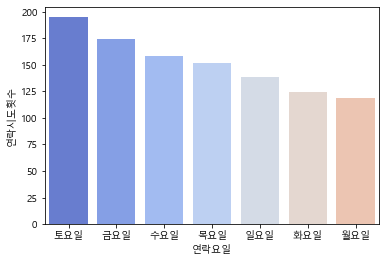

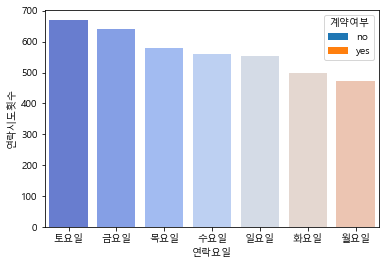

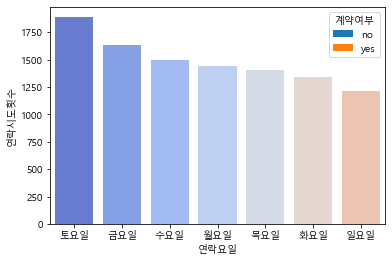

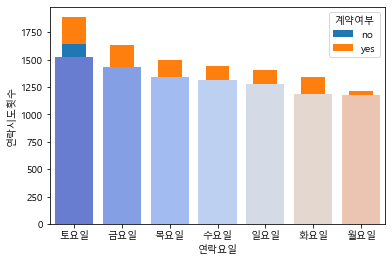

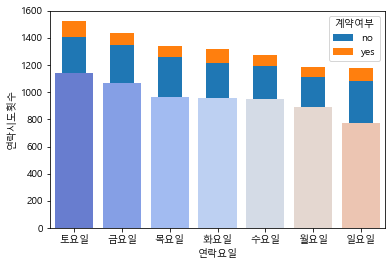

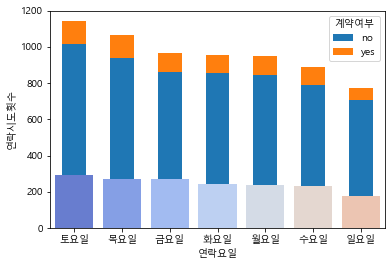

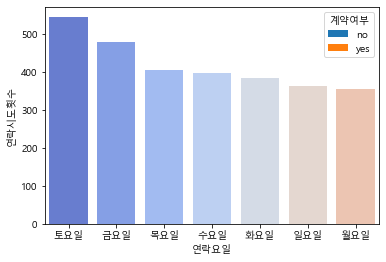

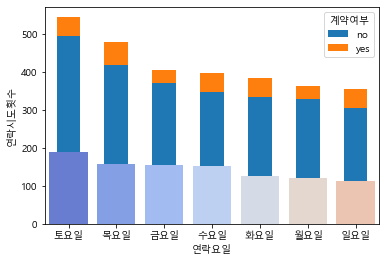

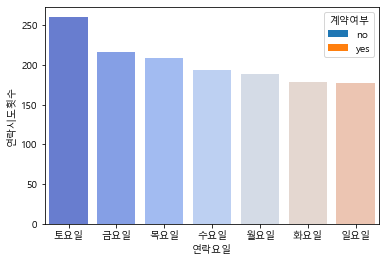

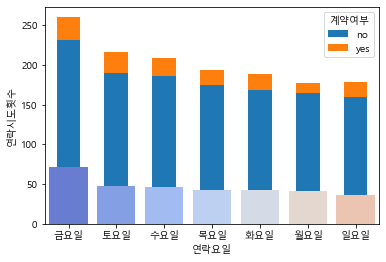

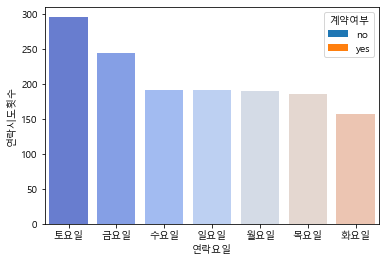

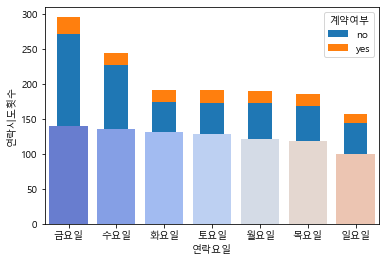

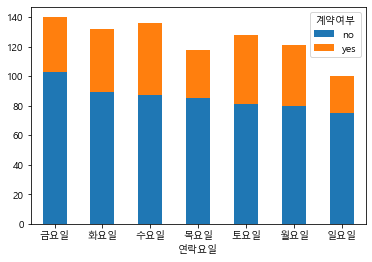

In [13]:
job_tel_day(df_tel, '주부')
job_tel_day(df_tel, '서비스종사자')
job_tel_day(df_tel, '회사원')
job_tel_day(df_tel, '산업노동자')
job_tel_day(df_tel, '기술자')
job_tel_day(df_tel, '은퇴')
job_tel_day(df_tel, '공무원')
job_tel_day(df_tel, '미취업자')
job_tel_day(df_tel, '자영업자')
job_tel_day(df_tel, '미확인')
job_tel_day(df_tel, '기업가')
job_tel_day(df_tel, '학생')

In [32]:
def job_tel_day2(df, val):
    df_job = df[df['직업군'] == val]
    p_day = pd.pivot_table(data=df_job, index=['연락요일', '계약여부'], values=['연락시도횟수'], aggfunc='count').reset_index()
    p_day['%'] = p_day['연락시도횟수'].div(p_day.groupby('연락요일')['연락시도횟수'].transform('sum'))
    p_yes = p_day[p_day['계약여부'] == 'yes'].sort_values(by='%', ascending=False)
    color = sns.color_palette('coolwarm', 10)
    sns.barplot(data=p_yes, x='연락요일', y='%', palette = color)
    plt.title(f'{val} 요일별 계약 성공비율')
    tel_job = df_job.groupby(['연락요일', '계약여부'])['계약여부'].count().unstack('계약여부').fillna(0)
    chi, pval, dof, expected = stats.chi2_contingency(observed = tel_job)
    print('{} chi-square test '.format(val))
    print('chisq : {0:.3f}'.format(chi))
    print('p : {0:3f}'.format(pval))

서비스종사자 chi-square test 
chisq : 3.702
p : 0.716882


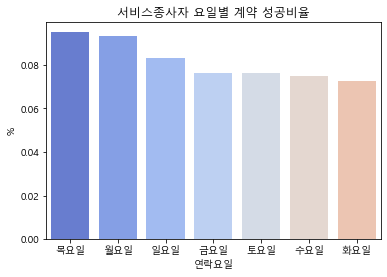

In [33]:
job_tel_day2(df_tel, '서비스종사자')

주부 chi-square test 
chisq : 11.469
p : 0.074925


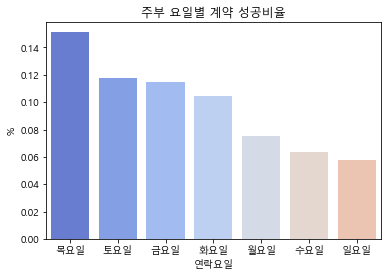

In [34]:
job_tel_day2(df_tel, '주부')

학생 chi-square test 
chisq : 7.615
p : 0.267663


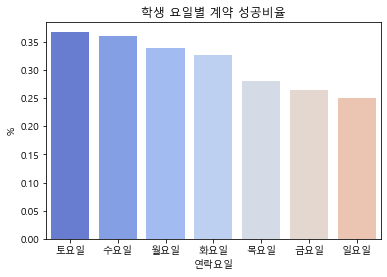

In [35]:
job_tel_day2(df_tel, '학생')

산업노동자 chi-square test 
chisq : 8.738
p : 0.188859


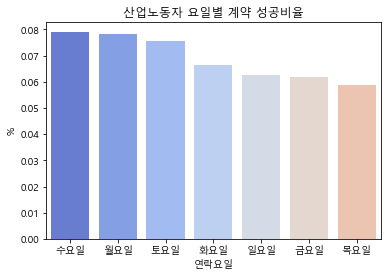

In [36]:
job_tel_day2(df_tel, '산업노동자')

기술자 chi-square test 
chisq : 5.454
p : 0.487050


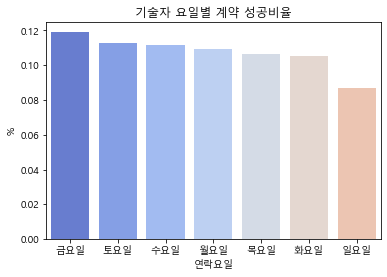

In [37]:
job_tel_day2(df_tel, '기술자')

자영업자 chi-square test 
chisq : 2.558
p : 0.861952


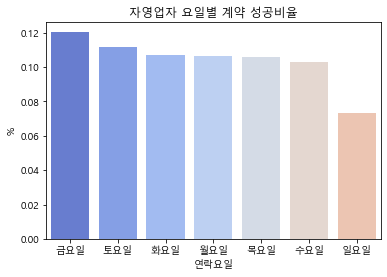

In [38]:
job_tel_day2(df_tel, '자영업자')

공무원 chi-square test 
chisq : 13.054
p : 0.042187


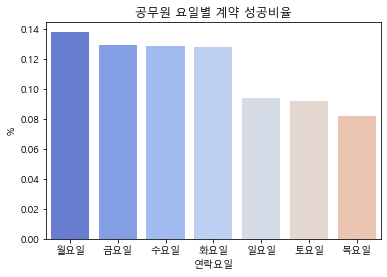

In [39]:
job_tel_day2(df_tel, '공무원')

회사원 chi-square test 
chisq : 17.649
p : 0.007173


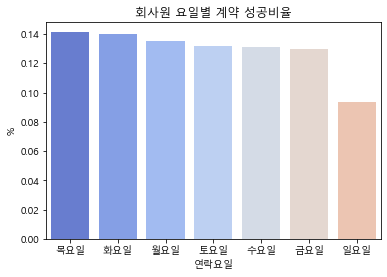

In [40]:
job_tel_day2(df_tel, '회사원')

미취업자 chi-square test 
chisq : 5.145
p : 0.525346


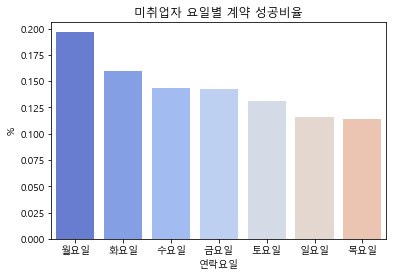

In [41]:
job_tel_day2(df_tel, '미취업자')

기업가 chi-square test 
chisq : 0.788
p : 0.992392


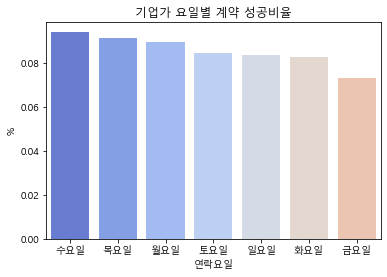

In [42]:
job_tel_day2(df_tel, '기업가')

학생 chi-square test 
chisq : 7.615
p : 0.267663


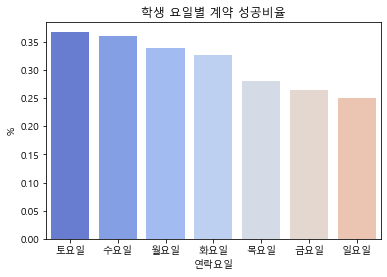

In [43]:
job_tel_day2(df_tel, '학생')

은퇴 chi-square test 
chisq : 8.425
p : 0.208571


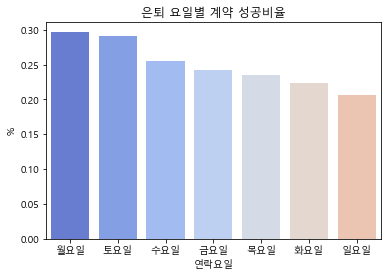

In [44]:
job_tel_day2(df_tel, '은퇴')

미확인 chi-square test 
chisq : 3.187
p : 0.785029


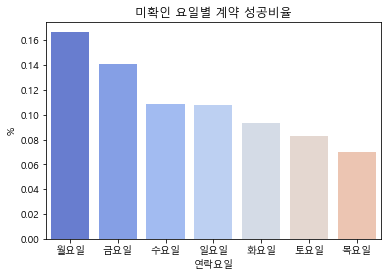

In [45]:
job_tel_day2(df_tel, '미확인')

계약여부,no,yes
연락요일,,
금요일,61,10
목요일,40,3
수요일,41,5
월요일,35,7
일요일,33,4
토요일,44,4
화요일,39,4


chi-square test 
chisq : 3.187
p : 0.785029
[[63.03939394  7.96060606]
 [38.17878788  4.82121212]
 [40.84242424  5.15757576]
 [37.29090909  4.70909091]
 [32.85151515  4.14848485]
 [42.61818182  5.38181818]
 [38.17878788  4.82121212]]


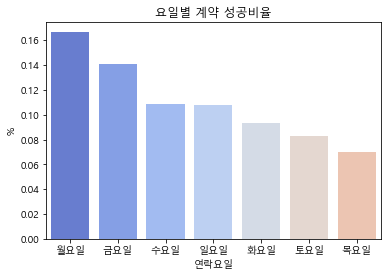

In [51]:
df_미확인 = df_tel[df_tel['직업군'] == '미확인']
p_day = pd.pivot_table(data=df_미확인, index=['연락요일', '계약여부'], values=['연락시도횟수'], aggfunc='count').reset_index()
p_day['%'] = p_day['연락시도횟수'].div(p_day.groupby('연락요일')['연락시도횟수'].transform('sum'))
p_yes = p_day[p_day['계약여부'] == 'yes'].sort_values(by='%', ascending=False)
color = sns.color_palette('coolwarm', 10)
sns.barplot(data=p_yes, x='연락요일', y='%', palette = color)
plt.title('요일별 계약 성공비율')
tel_job = df_미확인.groupby(['연락요일', '계약여부'])['계약여부'].count().unstack('계약여부').fillna(0)
chi, pval, dof, expected = stats.chi2_contingency(observed = tel_job)
display(tel_job)
print('chi-square test ')
print('chisq : {0:.3f}'.format(chi))
print('p : {0:3f}'.format(pval))
print(expected)

In [33]:
blue_job = ['산업노동자', '기술자', '서비스종사자', '자영업자']
white_job = ['주부', '공무원', '회사원', '미취업자','기업가', '은퇴', '학생', '미확인']
job = []
for i in range(len(df_tel)):
    if df_tel['직업군'][i] in blue_job:
        job.append('blue_job')
    elif df_tel['직업군'][i] in white_job:
        job.append('white_job')
df_tel['job'] = job

chi-square test 
chisq : 8.408
p : 0.209685


계약여부,no,yes
연락요일,,
토요일,3273,324
금요일,3069,291
목요일,2833,259
수요일,2749,272
화요일,2585,235
일요일,2569,206
월요일,2469,253


,0,1
0,3288.0,309.0
1,3071.0,289.0
2,2826.0,266.0
3,2761.0,260.0
4,2577.0,243.0
5,2536.0,239.0
6,2488.0,234.0


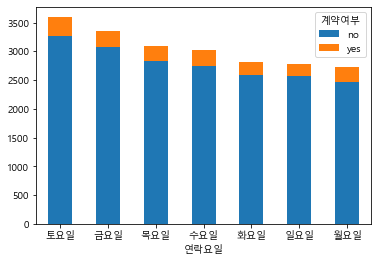

In [38]:
df_job1 = df_tel[df_tel['job'] == 'blue_job']
tel_day_g = df_job1.groupby(['연락요일', '계약여부'])['계약여부'].count().unstack('계약여부').fillna(0)
tel_day_g = tel_day_g.sort_values(by='no', ascending=False)
tel_day_g.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)

chi, pval, dof, expected = stats.chi2_contingency(observed = tel_day_g)
print('chi-square test ')
print('chisq : {0:.3f}'.format(chi))
print('p : {0:3f}'.format(pval))
display(tel_day_g)
display(pd.DataFrame(expected.round(0)))

In [50]:
df_tel['직업군'].value_counts()

회사원       10422
산업노동자      9254
기술자        6743
서비스종사자     3969
공무원        2924
은퇴         1720
기업가        1456
자영업자       1421
주부         1060
미취업자       1014
학생          875
미확인         330
Name: 직업군, dtype: int64

연락일자 -> 연락요일로 대체

In [11]:
df_tel.drop(['연락일자', 'year', 'month', 'day'], axis=1, inplace=True)
df_tel.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,카드종류,연락요일
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,NaN,0,no,87,수요일
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,NaN,0,no,88,수요일
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,NaN,0,no,89,수요일
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,NaN,0,no,90,수요일
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,NaN,0,no,91,수요일


In [12]:
df_tel.to_csv('Telemarketing_data_last.csv', index=False, encoding='cp949')